In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [48]:
num_iters = 5
K = 3
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=4, n_features=2, random_state=0)

In [49]:
X

array([[-0.46530384,  1.73299482],
       [-0.33963733,  3.84220272],
       [ 2.25309569,  0.99541446],
       ...,
       [ 1.03616476,  4.09126428],
       [-0.5901088 ,  3.68821314],
       [ 2.30405277,  4.20250584]])

In [50]:
# Checking Size of Data Set
X.shape

(2000, 2)

In [51]:
m=X.shape[0]
n=X.shape[1]

In [52]:
m

2000

In [53]:
n

2

In [54]:
import random
centroids=np.array([]).reshape(n,0) # creating an empty centroid array

In [55]:
centroids

array([], shape=(2, 0), dtype=float64)

In [56]:
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]] # creating 5 random centroids

In [57]:
centroids

array([[-1.11735223,  0.98850206, -2.57172033],
       [ 2.11828876,  5.87304694,  3.7077872 ]])

In [58]:
# creating an empty array
euclid=np.array([]).reshape(m,0)

In [59]:
euclid

array([], shape=(2000, 0), dtype=float64)

In [60]:
# finding distance between for each centroid
for k in range(K):
    dist=np.sum((X-centroids[:,k])**2,axis=1)
    euclid=np.c_[euclid,dist]

In [71]:
dist

array([ 2.80059764,  0.71399838, 15.9922423 , ...,  4.75351374,
        0.3070159 , 11.71468976])

In [73]:
euclid

array([[ 6.07984058, 34.49468991,  2.80059764],
       [10.32925272, 14.41560367,  0.71399838],
       [ 0.47666948, 53.91962507, 15.9922423 ],
       ...,
       [ 6.94866506, 16.3016413 ,  4.75351374],
       [10.90791302, 15.32734004,  0.3070159 ],
       [ 6.67412975, 22.28712092, 11.71468976]])

In [61]:
# storing the minimum value
minimum=np.argmin(euclid,axis=1)+1

In [62]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

In [63]:
# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]

for k in range(K):
    cent[k+1]=cent[k+1].T

In [64]:
cent

{1: array([[-0.46530384,  1.73299482],
        [-0.33963733,  3.84220272],
        [ 2.25309569,  0.99541446],
        ...,
        [ 2.99139667,  1.57604376],
        [-0.42969284,  3.71372968],
        [-0.5901088 ,  3.68821314]]),
 2: array([[-1.58231872,  8.74311864],
        [-0.23425799,  4.43276456],
        [-1.33558396,  7.28149527],
        ...,
        [-1.09755763,  8.53097833],
        [ 1.03616476,  4.09126428],
        [ 2.30405277,  4.20250584]]),
 3: array([[-2.71160084,  7.40565451],
        [-1.52732134,  3.29203735],
        [-2.32460677,  3.38725449],
        [-2.28305106,  7.05831251],
        [-4.05892383,  7.68480638],
        [-3.37603474,  4.3278344 ],
        [-2.30718388,  4.37191801],
        [-2.42679049,  3.39996287],
        [-2.7141701 ,  7.76587146],
        [-1.64186578,  3.41373293],
        [-4.25475449,  7.78829415],
        [-2.03632381,  6.39482767],
        [-2.03472419,  6.65898686],
        [-3.15407365,  7.2673743 ],
        [-2.26629932,  2.

In [65]:
# Geting mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [66]:
centroids[:,k]

array([-2.24265425,  4.1537276 ])

In [67]:
# repeating the above steps again and again
for i in range(num_iters):
    euclid=np.array([]).reshape(m,0)
    
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid=np.c_[euclid,dist]
    C=np.argmin(euclid,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(2,0)

    for k in range(m):
        cent[C[k]]=np.c_[cent[C[k]],X[k]]

    for k in range(K):
        cent[k+1]=cent[k+1].T

    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent

In [68]:
final

{1: array([[2.25309569, 0.99541446],
        [3.79589697, 0.60417861],
        [2.06850729, 0.77571873],
        ...,
        [3.10944543, 1.84849736],
        [2.99139667, 1.57604376],
        [2.30405277, 4.20250584]]),
 2: array([[-1.58231872,  8.74311864],
        [-1.33558396,  7.28149527],
        [-1.25187859,  7.35517291],
        ...,
        [-0.41862593,  8.24884504],
        [-1.26731399,  8.04111669],
        [-1.09755763,  8.53097833]]),
 3: array([[-0.46530384,  1.73299482],
        [-0.33963733,  3.84220272],
        [-1.76144205,  2.05452668],
        ...,
        [-0.42969284,  3.71372968],
        [ 1.03616476,  4.09126428],
        [-0.5901088 ,  3.68821314]])}

Text(0.5, 1.0, 'Original Dataset')

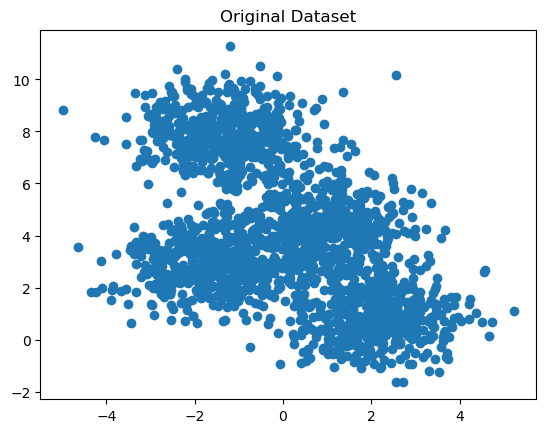

In [69]:
# Plotting Scatter Plot for Original Data
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')

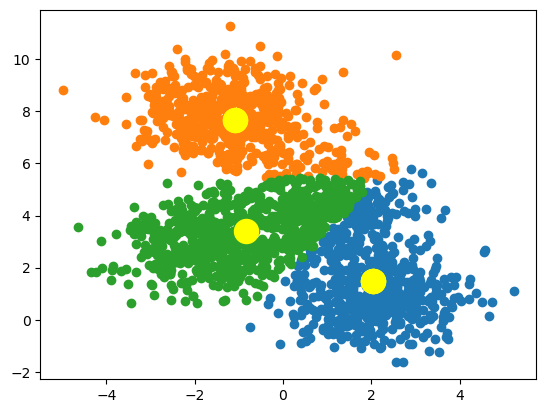

In [70]:
# Plotting Scatter Plot for Final Output using K-Mean Clustring
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
    plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.show()